<img
src="http://www.imt-atlantique.fr/sites/default/files/logo_mt_0_0.png"
WIDTH=180 HEIGHT=180>

<CENTER>
</br>
<p><font size="5"> Cursus Recherche : Module Analogie </font></p>
<p><font size="5"> Representation Learning </font></p>
</br>
<p><font size="4"> [<span style="color:blue">Institut Mines Télécom</span>](https://www.mines-telecom.fr/en/)</p>

</CENTER>

----------------------------

# <span style="color:##00B8DE"> Prise en main de Jupyter Hub</span>

Installation préliminaire

**1)** Installation de Python 3.6.3


**2)** Définition des variables d'environnement : new PATH

In [1]:
pip3 install jupyter

1)

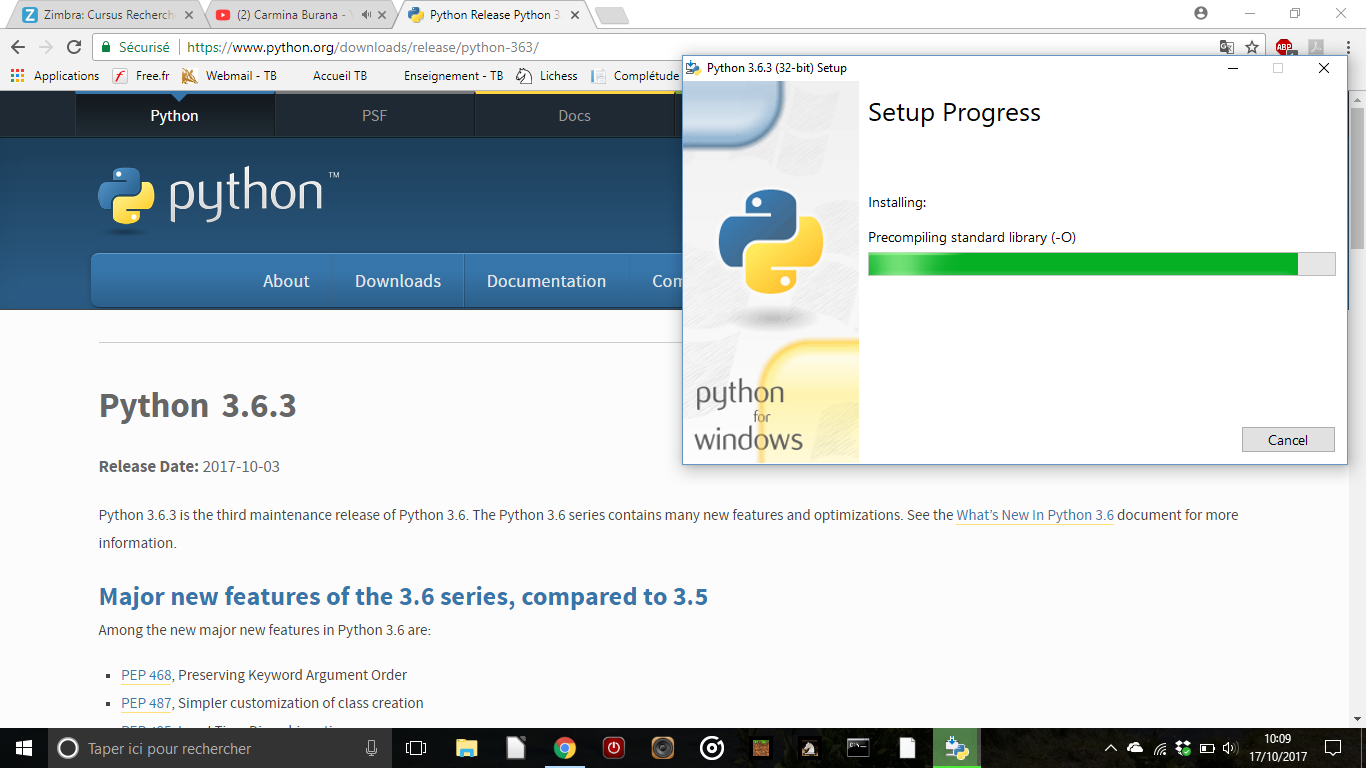


2)
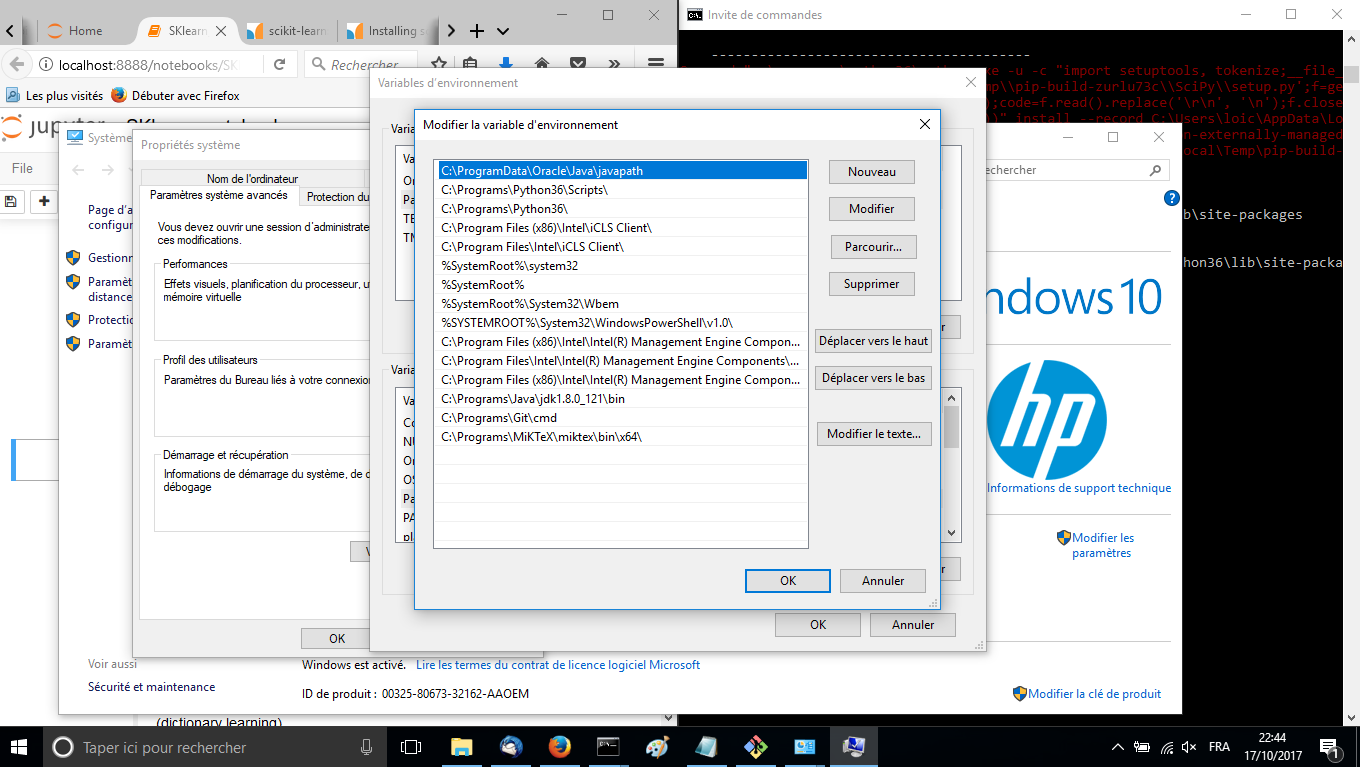

# <span style="color:##00B8DE"> Prise en main SKLearn</span>


> **1)** Installation librairie SKLearn

> **2)** Chargement de Datasets : un simple iris

> **3)** un généré à la main

> **4)** un complexe, image : MNIST, Olivetti Faces

> **5)** Comparaison de méthodes simples PCA, ICA, k-means, (dictionary learning)

In [1]:
pip3 install -U scikit-learn

SyntaxError: invalid syntax (<ipython-input-1-af9206c7c4f9>, line 1)

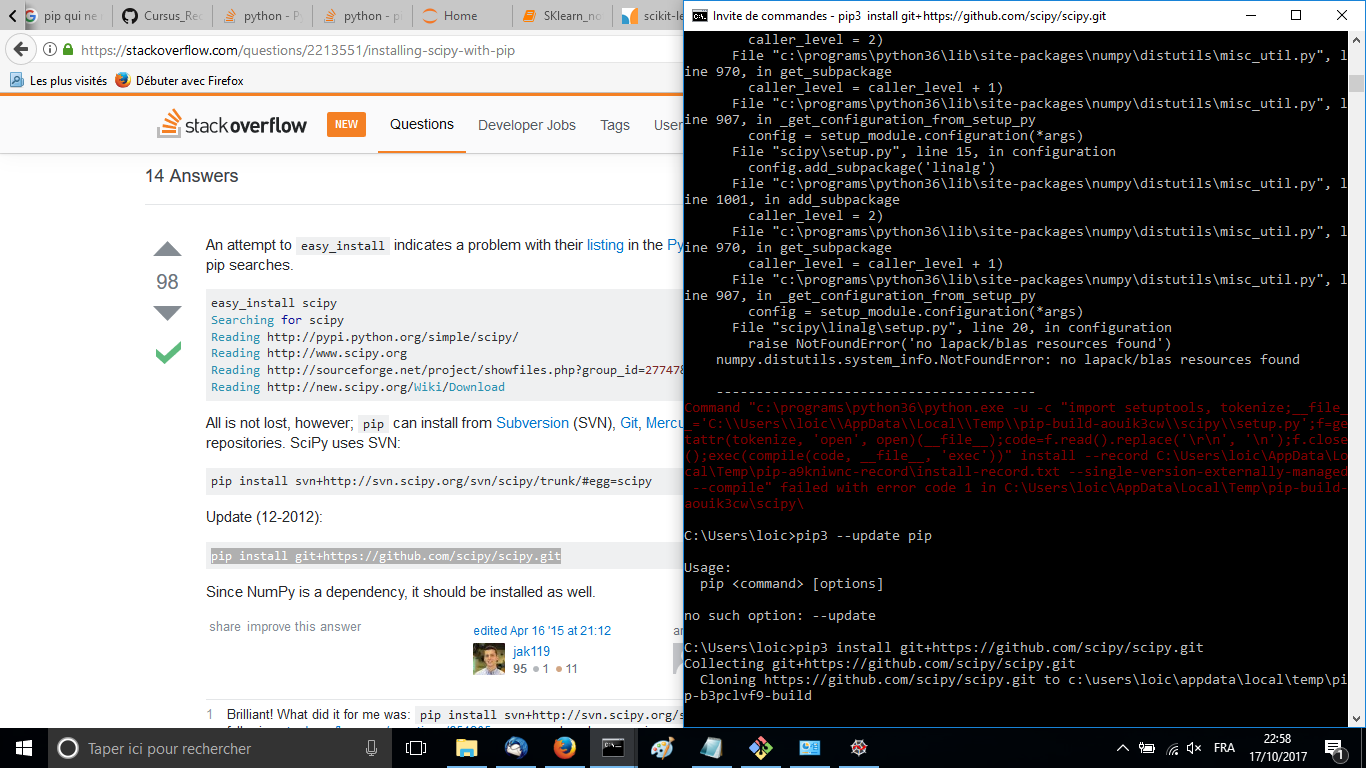

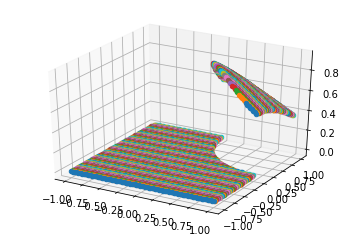

In [13]:
# Real Distribution
def plotRealDitrib():
    Z = []
    fig = figure()
    ax = fig.gca(projection = '3d')
    X = linspace(-1,1,10**2)
    Y = linspace(-1,1,10**2)
    for x in X:
        for y in Y:
            z= calculateP(x,y)
            Z.append(z)
            ax.scatter(x,y,z)
plotRealDitrib()

In [ ]:
NbSample = 10**4
deltas = [10**(k) for k in range(-3,2)]
for delta in deltas:
    Xtvalues = HastingsMetropolis(NbSample,delta)
    KeptX = Xtvalues[NbSample//2:]
    meansx.append(mean(KeptX[:,0]))
    meansy.append(mean(KeptX[:,1]))
    stds.append(std(Xtvalues))

    
fig0 = plt.figure()
KeptX = Xtvalues[NbSample//2:]
plt.plot(KeptX[:,0],KeptX[:,1],'or')
plt.title('Xt Values')
plt.show()
len(meanx)
fig1 = plt.figure()
plt.plot(deltas,meansx)
plt.title('Mean of the x component')
plt.show()
fig2 = plt.figure()

plt.plot(deltas,meansy,'r')
plt.title('Mean of the y component')
plt.show()
fig3 = plt.figure()
plt.plot(deltas,stds,'k')
plt.title('Standard Deviation')
plt.show()

4)
$\iint_D p(x,y) \,dx\,dy$ = 1

C = $\iint_D C dz$ = $\iint_D C \frac {\exp(-\frac{x^2+y^2}{2})} {\exp(-\frac{x^2+y^2}{2})} dx dy$ = $\iint_D p(x,y) \exp(\frac{x^2+y^2}{2}) dx dy$


# <span style="color:##00B8DE"> Gibbs algorithm</span>

Ising model is much used in physics, in particular for modelling magnetic moments of atoms in ferro-magnetic materials where moments can only take 2 opposite values, say +1 and -1. We assume here a plane atomic arrangement with atoms at points $M\in\mathbb{Z}^2$.
The probability of state $x_M=\pm 1$ for the atom at location $M$ depends on the values of its neighbouring atoms, for some neighbourhood $V_M$ of $M$. Up to a constant factor, Ising model is given as a probability in the form 

$$
 \pi(x) \propto \exp(H \sum_i x_i +J \sum_{(i,j) \in V_x} x_i x_j) 
$$

where $H\in\mathbb{R}$ and $J\in\mathbb{R}_+$ are constants.

1) Write a code that enables generating a 2D realization of Ising model on a $200\times 200$ grid. Here, neighbourhoods will be defined by the 8 nearest neighbours. 

2) Test the influence of parameters $H$ and $J$. Possibly, different factors can be used for each term (for instance, $\sum_{(i,j) \in V_x} J_{ij}x_i x_j$ instead of $J \sum_{(i,j) \in V_x} x_i x_j$)

$P(X^1 = 1 ~|~ X^2,...,X^n)$ = $\frac {P(X^1 = 1 , X^2,...,X^n)} {P(X^2,...,X^n)} $ = $\frac {\pi(x)}{\alpha} $

$P(X^1 = -1 ~|~ X^2,...,X^n)$ = $\frac {P(X^1 = -1 , X^2,...,X^n)} {P(X^2,...,X^n)} $ = $\frac {\pi(x')}{\alpha} $

$P(X^1 = 1 ~|~ X^2,...,X^n) + P(X^1 = -1 ~|~ X^2,...,X^n) = 1$

$ \alpha = \pi(x) + \pi(x') $

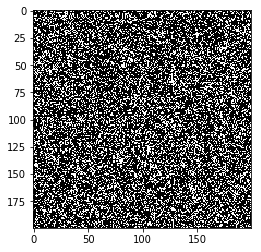

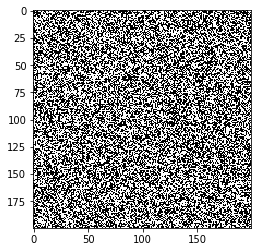

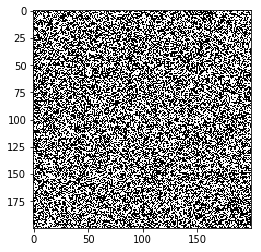

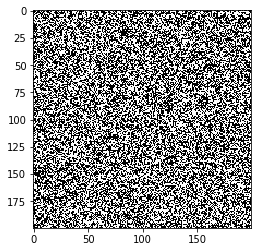

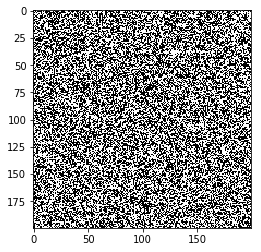

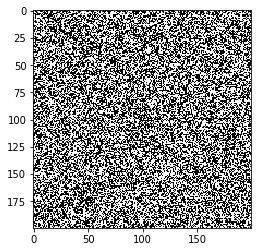

In [14]:
N = 10
Neighbours = 8
ShapeGrid = [200,200]
H = -1
J = 10

def init(Shape):
    MomentsGrid = zeros(ShapeGrid) # Initialization
    Image = ones([200,200,3])
    for i in range(0,200):
        for j in range(0,200):
            if Bernoulli(0.7):
                MomentsGrid[i][j] = 1
                Image[i][j] = [0,0,0]
            else :
                MomentsGrid[i][j] = -1
                Image[i][j] = [1,1,1]
    return [MomentsGrid,Image]

def Bernoulli(p):
    return int(rand()<p) 

def NeighboursCenter(x,y):
    T = arange(-1,2)
    neighborsList = []
    for i in T:
        for j in T:
            neighborsList.append((x+i,y+j))
    return neighborsList
def VM(x,y):
    Neigh = []
    if x == ShapeGrid[0] -1:
        if y == ShapeGrid[1] -1: #DownRight
            Neigh = NeighboursCenter(x-1,y-1)
            Neigh.pop(-1)
        elif y == 0: #DownLeft
            Neigh = NeighboursCenter(x-1,y+1)
            Neigh.pop(6)
        else: #Down
            Neigh = NeighboursCenter(x-1,y)
            Neigh.pop(7)
    elif x == 0: #UP
        if y == ShapeGrid[1] -1: #UpRight
            Neigh = NeighboursCenter(x+1,y-1)
            Neigh.pop(2)
        elif y == 0: #UpLeft
            Neigh = NeighboursCenter(x+1,y+1)
            Neigh.pop(0)
        else: #Up
            Neigh = NeighboursCenter(x+1,y)
            Neigh.pop(1)
    elif y == ShapeGrid[1]-1: #Right
        Neigh = NeighboursCenter(x,y-1)
        Neigh.pop(5)
    elif y == 0: #Left
        Neigh = NeighboursCenter(x,y+1)
        Neigh.pop(3)
    else:
        Neigh = NeighboursCenter(x,y)
        Neigh.pop(4)
    return Neigh    

def probabilityM(x,y,momentsGrid):
    sumAllStates = sum(momentsGrid)
    Neigh = VM(x,y)
    sumNeigh = 0
    for i in range(len(Neigh)):
        v1 = Neigh[i]
        sumNeigh+=momentsGrid[v1[0]][v1[1]]
    return exp(momentsGrid[x][y]*(H + J * sumNeigh))

def loopGips(momentGrid,image):
    for i in range(0,200):
        for j in range(0,200):
            momentGrid_1 = momentGrid
            momentGrid_2 = momentGrid
            momentGrid_1[i][j] = 1
            momentGrid_2[i][j] = -1
            A = probabilityM(i,j,momentGrid_1)
            B = probabilityM(i,j,momentGrid_2)
            px = A/(A+B)
            if Bernoulli(px):
                momentGrid[i][j] = 1
                image[i][j] = [0,0,0]
            else :
                momentGrid[i][j] = -1
                image[i][j] = [1,1,1]
    return [momentGrid,image]

MomentsGrid,Image = init(ShapeGrid)
fig = plt.figure()
imshow(Image)
plt.show()

for numberLoop in range(0,N):
    #print(numberLoop)
    [MomentsGrid,Image] = loopGips(MomentsGrid,Image)
    if numberLoop%2==0:
        fig = plt.figure()
        imshow(Image)
        plt.show()
        

In [15]:
help(imshow)


Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, shape=None, filternorm=1, filterrad=4.0, imlim=None, resample=None, url=None, hold=None, data=None, **kwargs)
    Display an image on the axes.
    
    Parameters
    ----------
    X : array_like, shape (n, m) or (n, m, 3) or (n, m, 4)
        Display the image in `X` to current axes.  `X` may be an
        array or a PIL image. If `X` is an array, it
        can have the following shapes and types:
    
        - MxN -- values to be mapped (float or int)
        - MxNx3 -- RGB (float or uint8)
        - MxNx4 -- RGBA (float or uint8)
    
        The value for each component of MxNx3 and MxNx4 float arrays
        should be in the range 0.0 to 1.0. MxN arrays are mapped
        to colors based on the `norm` (mapping scalar to scalar)
        and the `cmap` (mapping the normed scalar to a color).
    
    cm

# <span style="color:#00B8DE"> Simulated annealing algorithm</span>

let us consider the following function

$$
f(x,y) = (x^2+y^2) + 15(\cos(x-1) + \sin(y+1))
$$

defined on domain $\mathcal{E}=[-10,10]\times [-10,10]$. We look for the minimum of $f(x,y)$. To this end, we use a simulated annealing algorithm that is defined as follows:
    
----

- build a decreasing sequence of temperatures $(T_k)_{k=1,2,\ldots}$ that decreases to 0

- initialize $(x,y)=(x_0,y_0)$

- for $k=1,\ldots,K$,

>- draw sample $(\Delta_x,\Delta_y)$ according to some prescribed distribution

>- calculate $(x_{n+1},y_{n+1})=(x_n,y_n)+(\Delta_x,\Delta_y)$

>- draw sample $u\sim \mathcal{U}_{[0,1]}$

>- if $u < \min \displaystyle{\left(1,\exp (-\;\frac{f(x_n,y_n)-f(x,y)}{T_k} )\right)}$, then $(x,y)=(x_n,y_n)$.

- select the final $f(x,y)$ as an approximate minimum.

----

**1)** Explain the algorithm

**2)**
Apply this algorithm to $f (x, y)$ for the following evolution of the temperature parameter: $T_1 = 10$, $T_{i+1} = \alpha T_i$ and $T_K = 0.01$, with $K = 10^5$. Express the value of $\alpha$ in terms of $T_1$ and $T_K$ . For simulating $\Delta x$ and $\Delta y$ you can choose uniform distributions $\mathcal{U}_{[-1,1]}$ or Gaussian distributions $\mathcal{N}(0, 1)$. Initialization of the algorithm will be random inside $E$.

**3)** Run the algorithm several times. Find the minimum directly over a discretization grid of $f(x,y)$. Remarks and conclusions ?

2) $T_K = \alpha^{K-1} T_1$

$ \alpha  $ = $ \sqrt[K-1]{ \frac {T_K}  {T_1} } $

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: overflow encountered in exp
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: overflow encountered in double_scalars
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:18: RuntimeWarning: divide by zero encountered in double_scalars


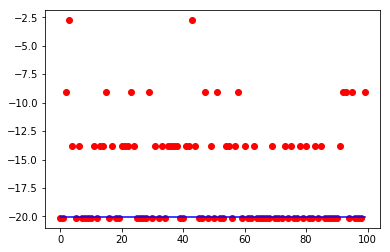

In [16]:
K = 10**5
alpha = (0.01 / 10)**1/(K-1)
def f(x,y):
    return x**2 + y**2 + 15*(cos(x-1)+sin(y+1))

def T(i):
    T1 = 10
    return alpha**(i-1) * T1

def algorithm():
    x,y = 0,0
    xn , yn = x,y
    for k in range(K):
        deltax = randn()
        deltay = randn()
        u = rand()
        xn,yn = x+deltax , y+deltay
        if u < min(1 , exp(- (f(xn,yn)-f(x,y))/T(k))):
            x,y = xn,yn
    return f(x,y)

x = linspace(-10,10,100)
y = linspace(-10,10,100)
X,Y = meshgrid(x,y)
Z = f(X,Y)
minZ = np.inf
for i in range(len(Z)):
    minZ = min(minZ,min(Z[i]))
    
values = []
discretized = []
for j in range(0,100):
    values.append(algorithm())
    discretized.append(minZ)

fig = plt.figure()
plt.plot(values,'or')
plt.plot(discretized,'b')
plt.show()


# <span style="color:#00B8DE">EM algorithm</span>

Let us consider a mixture model involving $K=6$ components with weights, means and variances respectively given by: $\mathbf{\pi}  = [.1,.2,.1,.2,.3,.1]$, $\mathbf{m}  = [-6,-4.5, -1, 0, 3, 7]$ and $\mathbf{\sigma^2}=[3,3,2,1,4,1]$.

> 1) Write functions for generating the mixture distribution pdf and for drawing samples from this distribution.
Draw $N=2000$ samples that will be used in the following.

> 2) Implement the codes for the histogram and kernel estimators and draw them together with the true pdf. For the kernel method, check the influence of the value of the bandwidth $h$.

> 3) Implement the EM algorithm and compare the estimated pdf with the true one. Compare also the estimated mixture components with the true one. In this case, the EM algorithm is also known as Baum-Welch algorithm (see e.g. https://en.wikipedia.org/wiki/Baum–Welch_algorithm)

> 4) Study the influence of over and under-fitting for EM algorithm.

In [144]:
def ddpRealNormal(x,sigma2):
    return 1/sqrt(2*pi*sigma2) * exp(-(x**2)/2/sigma2)

def mixture(x,listm,listsigma2,listpi,K):
    res = 0
    for k in range(K):
        res += listpi[k] * ddpRealNormal(x-listm[k],listsigma2[k])
    return res

def Sample(NbSample,K):
    Samples = []
    for k in range(NbSample): 
        dart = rand()
        for n in range(K):
            if n==0:
                if dart <= Picum[0]:
                    sample = sqrt(sigma2[0])*randn()+m[0]
                    Samples.append(sample)
            elif dart <= Picum[n] and dart >Picum[n-1]:
                sample = sqrt(sigma2[n])*randn()+m[n]
                Samples.append(sample)
    return Samples
                
def KernEstim(x,Samples,h):
    N = len(Samples)
    res = 0
    for n in range(N):
        res += ddpRealNormal((x-Samples[n])/h,1)
    return  1/(N*h)*res

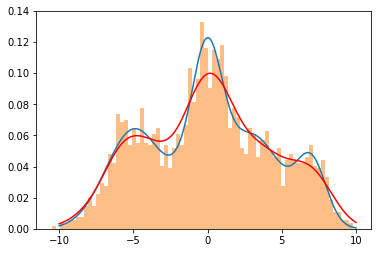

In [145]:
N=2000
NbKer = 6
Pi = [0.1,0.2,0.1,0.2,0.3,0.1]
Picum = [0.1,0.3,0.4,0.6,0.9,1]
m = [-6,-4.5,-1,0,3,7]
sigma2 =[3,3,2,1,4,1]
#
h = 1
Samples = Sample(N,NbKer)
X = np.linspace(-10,10,10**5)

fig = plt.figure()
plot(X,mixture(X,m,sigma2,Pi,NbKer))
#plt.show()

#fig2 = plt.figure()
plot(X,KernEstim(X,Samples,h),'r')
H = hist(Samples,75,normed=1,alpha = 0.5)
plt.show()

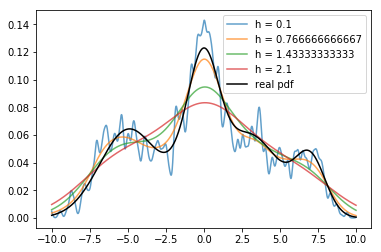

In [98]:
#Méthode à noyau
H = linspace(0.1,2.1,4)
fig = plt.figure()
for h in H:
    plot(X,KernEstim(X,Samples,h),label = 'h = '+str(h),alpha = 0.7)
plot(X,mixture(X,m,sigma2,Pi),'k',label = 'real pdf')
legend()
plt.show()


On considère p la pdf à estimer.
On note f la loi suivi par le mélange

$p(x,\Theta)=\sum_{k=1}^K\pi_kf(x,\theta_k)$

$L(x,z,\Theta)=\sum_{i=1}^n\sum_{k=1}^Kz_{ik}\log\left(\pi_kf(x_i,\theta_k)\right)$


$Q\left(\Theta,\Theta^{'}\right)=\sum_{i=1}^n\sum_{k=1}^KE\left(z_{ik}|x,\Theta^{'}\right)\log\left(\pi_kf(x_i,\theta_k)\right)$

Etape E: il faut calculer $t_{ik}$ avec $t_{ik}=E\left(z_{ik}|x,\Theta^{'}\right)$
Soit 

$t_{ik}=\frac{\pi_k^{(c)}f(x_i,\theta_k^{(c)})}{\sum_{\ell=1}^K\pi_\ell^{(c)} f(x_i,\theta_\ell^{'})} $

In [154]:
#Algorithme EM

def t(X,i,k,Pi,M,Sigma2,K):
    num = Pi[k]*ddpRealNormal(X[i]-M[k],Sigma2[k])
    denom = 0
    for l in range(K):
        denom += Pi[l]*ddpRealNormal(X[i]-M[l],Sigma2[l])
    return num/denom

def EMAlg(X,NbIter,K):
    N = len(X)
    #K =Ordre 
    #init
    Pi = [1/K for g in range(K)] #taille K
    M = [k for k in range(K)]    #taille K
    Sigma = [rand() for l in range(K)] #taille K
    for i in range(NbIter):
        #E Step
        T =zeros((N,K))
        for n in range(N):
            for k in range(K):
                T[n,k]=t(X,n,k,Pi,M,Sigma,K)
        #M Step       
        for k in range(K):
            numm = 0
            denom = 0
            nums = 0
            for n in range(N):
                numm += T[n,k]*X[n]
                denom += T[n,k]
                nums += T[n,k]*((X[n]-M[k])**2)
            M[k] = numm/denom
            Sigma[k] = nums/denom
            Pi[k] = sum(T[:,k])/sum(T)
    return M,Sigma,Pi

def printEM(X,NbIter,K,NbSample,Pipdf,Sigmapdf,Mpdf,NbKer):
    Samples = Sample(NbSample,NbKer)
    M,Sigma,Piapprox = EMAlg(Samples,NbIter,K)
    fig = plt.figure()
    plot(X,mixture(X,M,Sigma,Piapprox,K),'r',label = 'approximated pdf K = '+str(K))
    plot(X,mixture(X,Mpdf,Sigmapdf,Pipdf,NbKer),label = 'real pdf')
    legend()
    plt.show()

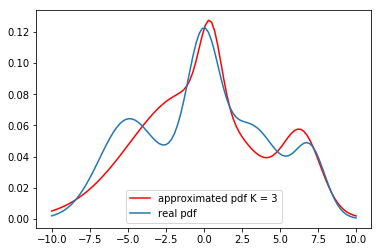

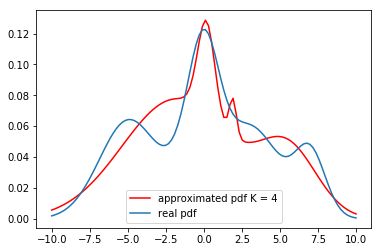

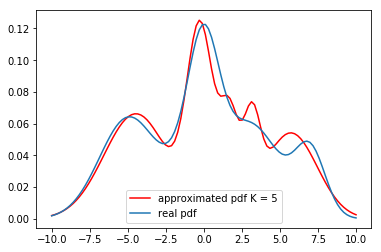

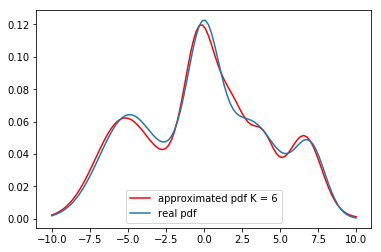

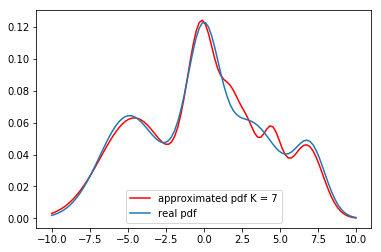

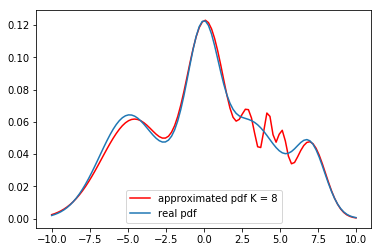

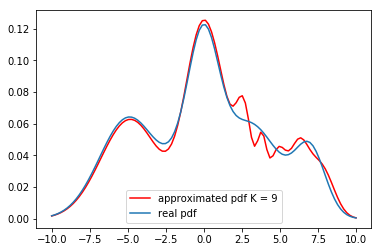

In [155]:
Pi = [0.1,0.2,0.1,0.2,0.3,0.1]
m = [-6,-4.5,-1,0,3,7]
sigma2 =[3,3,2,1,4,1]
N = 10**2
X = np.linspace(-10,10,N)
NbIter = 10**2
NbSample = 2000
K = [k for k in range(3,10)] #To approach
NbKer = 6 #Real one
for k in K:
    printEM(X,NbIter,k,NbSample,Pi,sigma2,m,NbKer)